# Regresión con los datos del dataset California
Alberto Armijo Ruiz

In [1]:
# Primero leemos los datos.
california =  read.csv("datos/california.dat", comment.char = "@", header=FALSE)
temp = scan("datos/california.dat", what=character())
ini = grep("inputs", temp, fixed=TRUE) + 1
fin = grep("outputs", temp, fixed=TRUE) - 1
y_pos = grep("outputs", temp, fixed=TRUE) + 1 
cal_attr = temp[ini:fin]
cal_attr = c(cal_attr,temp[y_pos])
cal_attr = unlist(strsplit(cal_attr,"[,]"))
colnames(california) = cal_attr
rm(temp)
rm(cal_attr)

In [2]:
summary(california)

   Longitude         Latitude     HousingMedianAge   TotalRooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00    Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00    1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00    Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64    Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00    3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00    Max.   :39320  
 TotalBedrooms      Population      Households      MedianIncome    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 295.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   Max.   :6082.0   Max.   :15.0001  
 MedianHouseValue
 Min.   : 14999  
 1st Qu.:119

Loading required package: ggplot2


[1] "Longitude"        "Latitude"         "HousingMedianAge" "TotalRooms"      
[5] "TotalBedrooms"    "Population"       "Households"       "MedianIncome"    
[9] "MedianHouseValue"

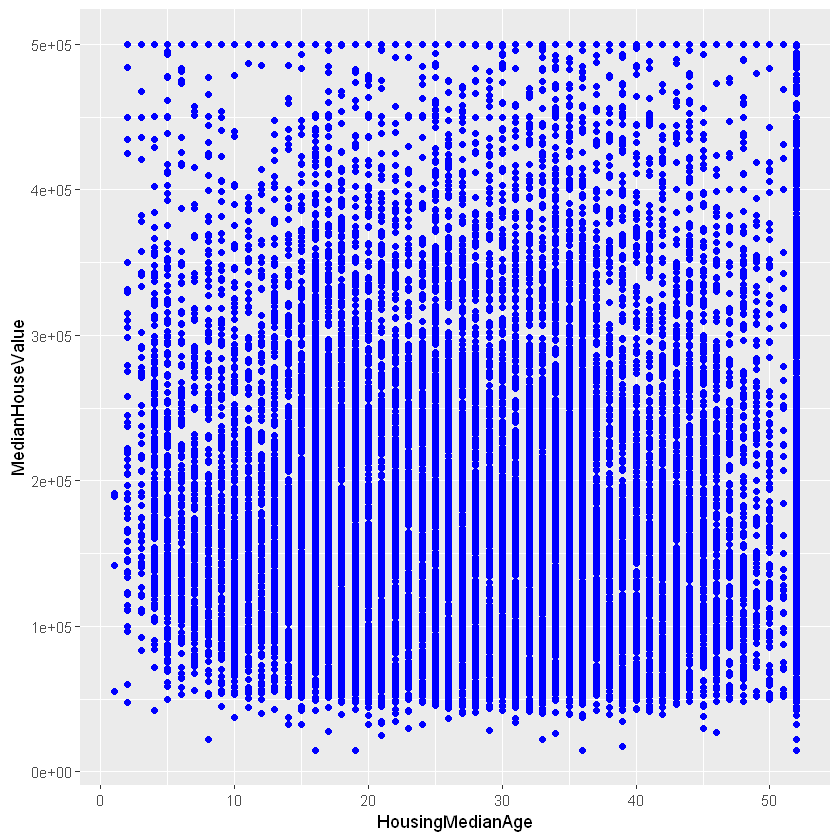

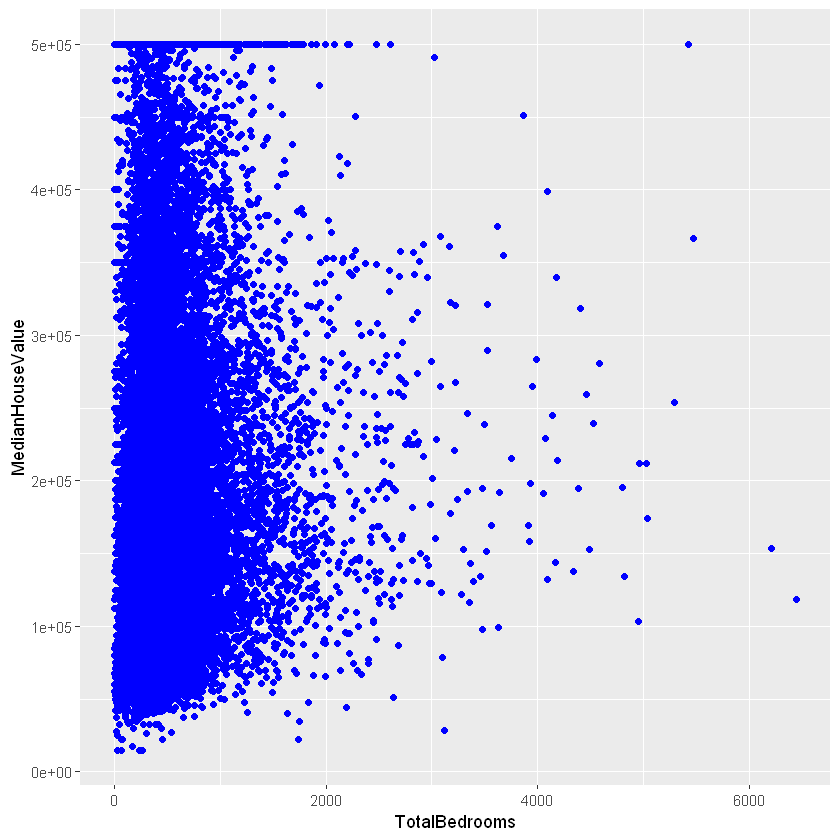

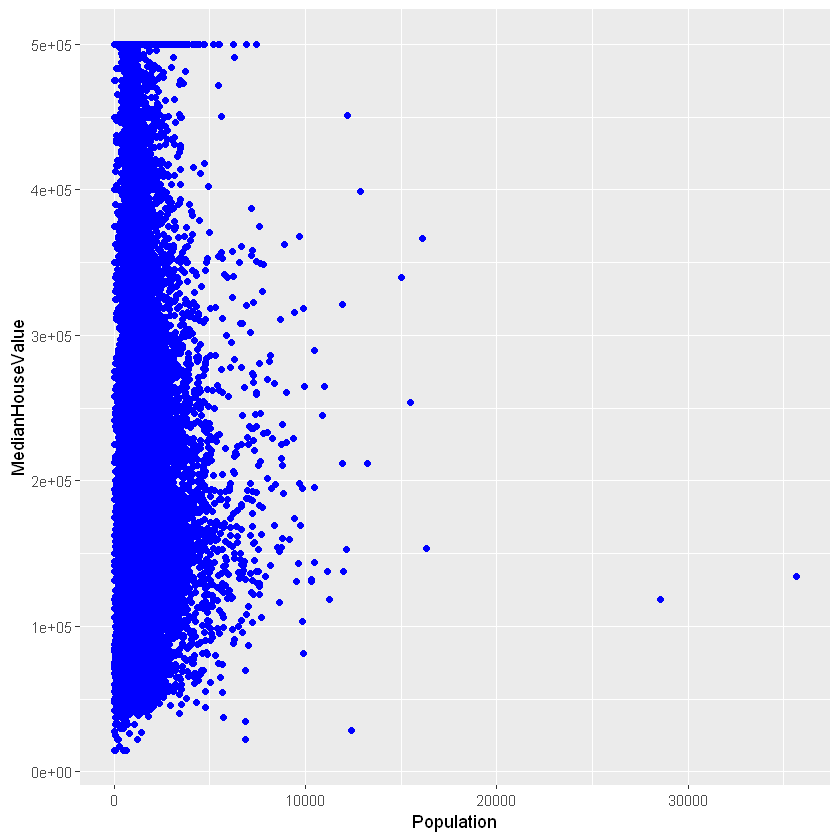

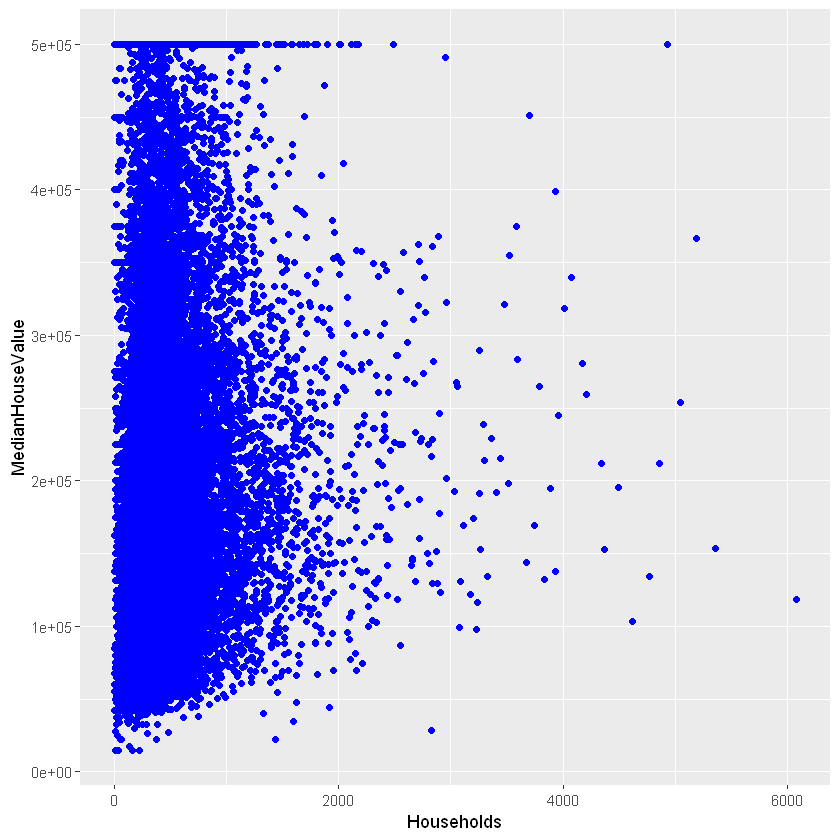

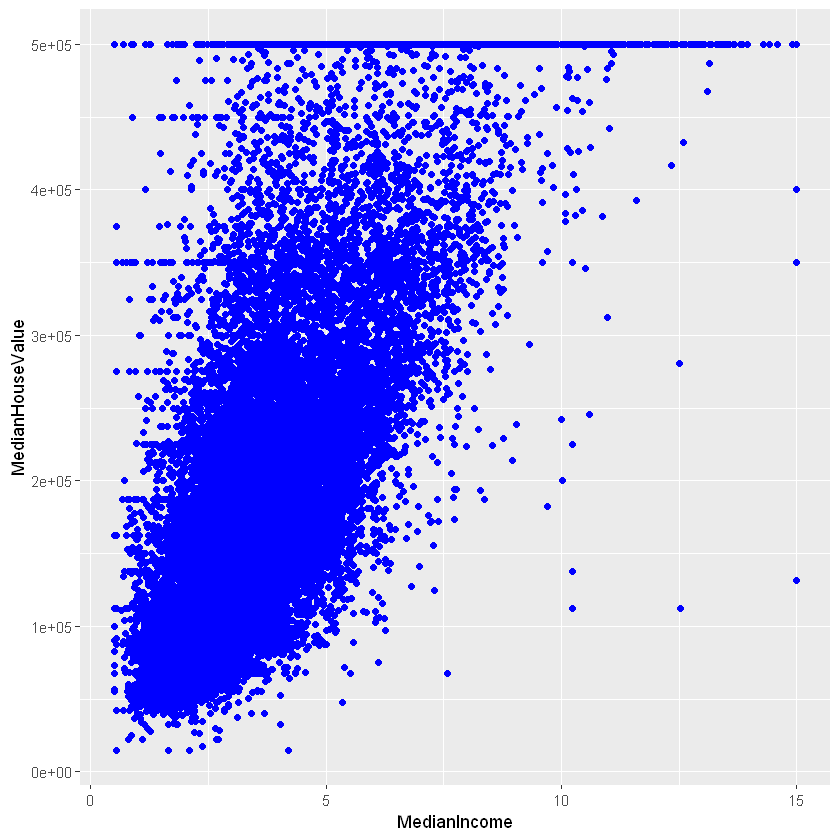

In [12]:
# Primero miraremos las variables para ver cuales se adaptan mejor a un modelo lineal.
require(ggplot2)
colnames(california)
ggplot(california,aes(x=Longitude,y=MedianHouseValue))+geom_point(col="blue")
ggplot(california,aes(x=Latitude,y=MedianHouseValue))+geom_point(col="blue")
ggplot(california,aes(x=HousingMedianAge,y=MedianHouseValue))+geom_point(col="blue")
ggplot(california,aes(x=TotalRooms,y=MedianHouseValue))+geom_point(col="blue")
ggplot(california,aes(x=TotalBedrooms,y=MedianHouseValue))+geom_point(col="blue")
ggplot(california,aes(x=Population,y=MedianHouseValue))+geom_point(col="blue")
ggplot(california,aes(x=Households,y=MedianHouseValue))+geom_point(col="blue")
ggplot(california,aes(x=MedianIncome,y=MedianHouseValue))+geom_point(col="blue")


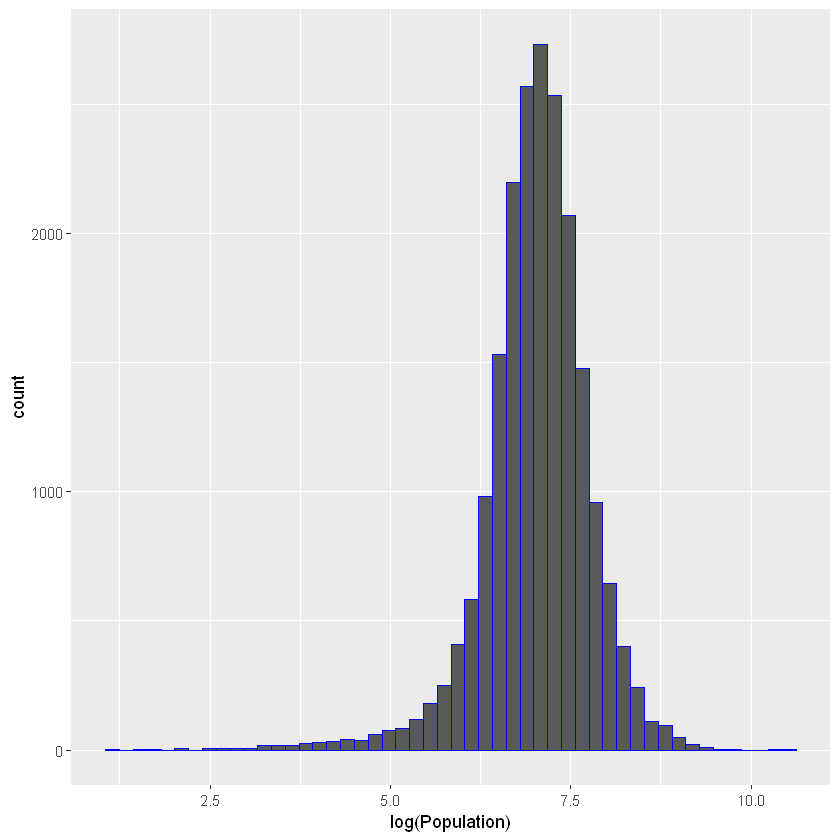

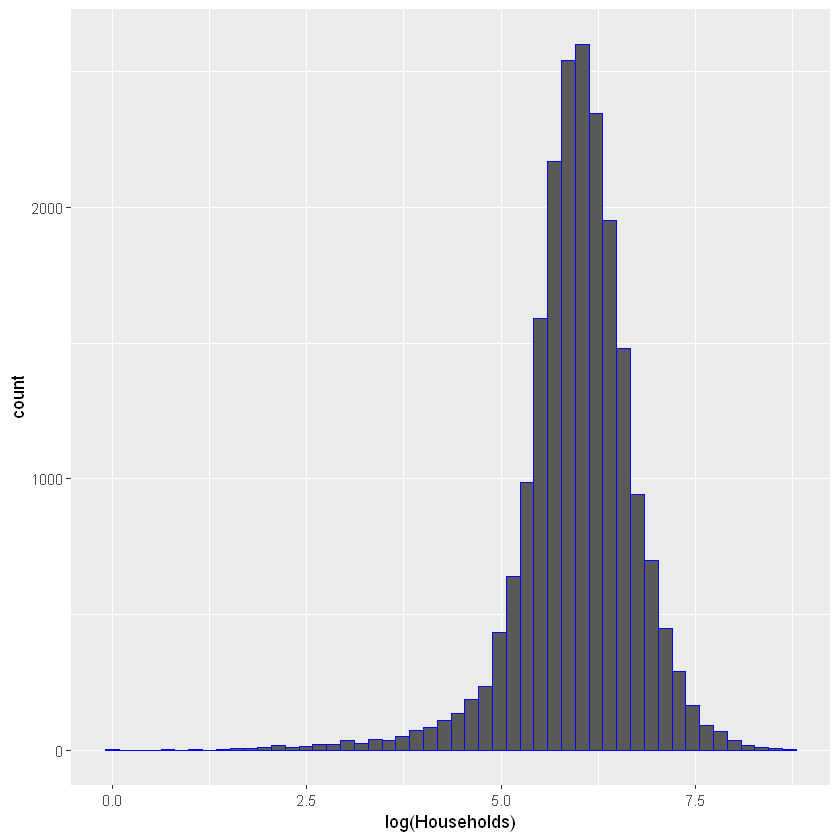

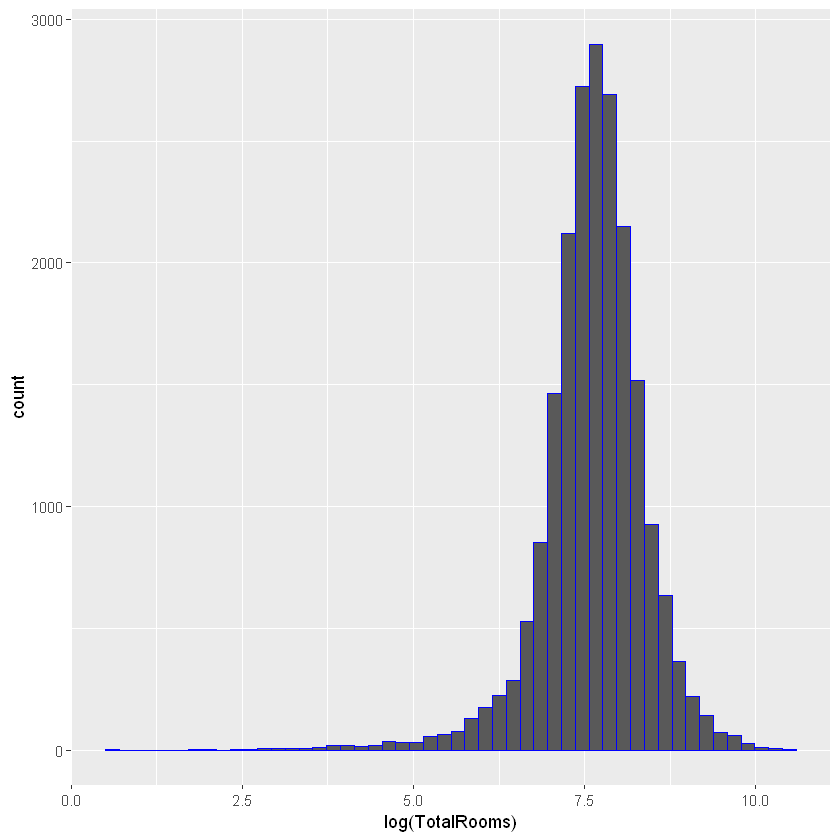

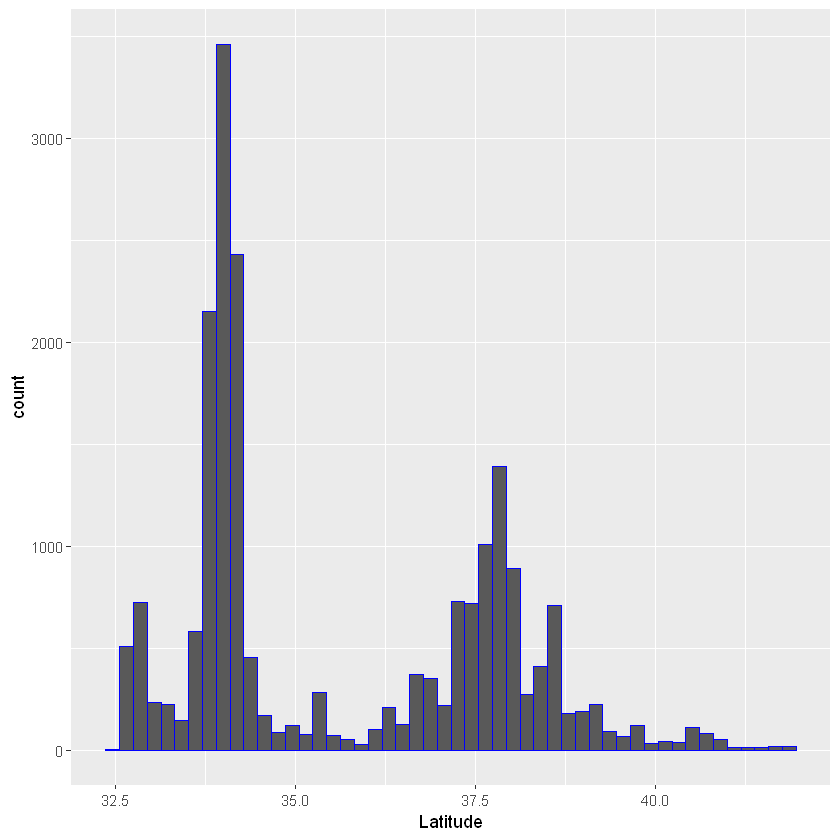

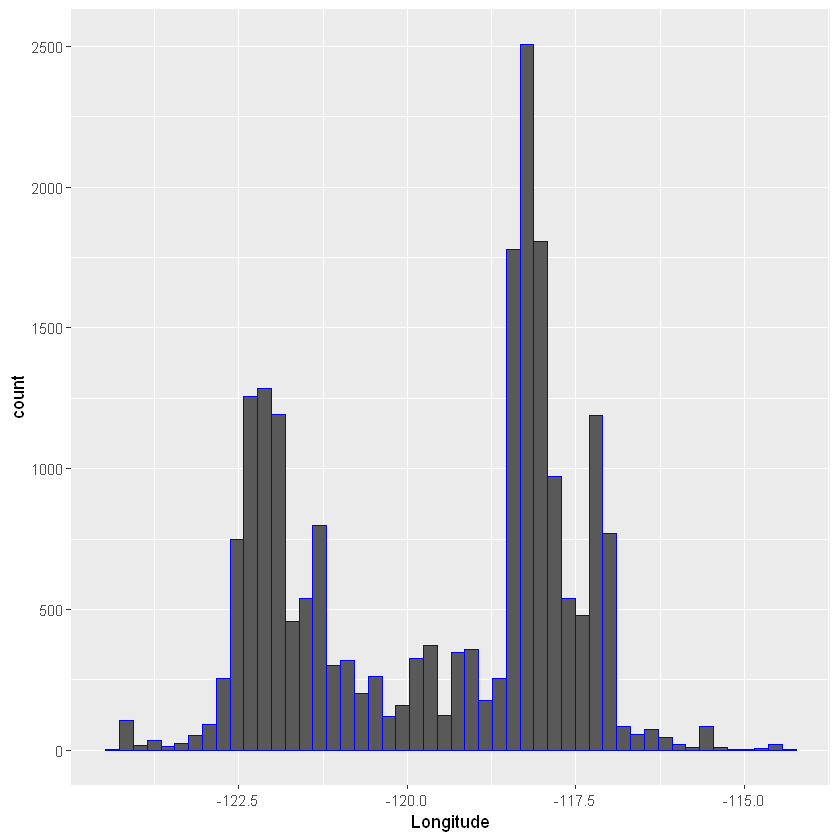

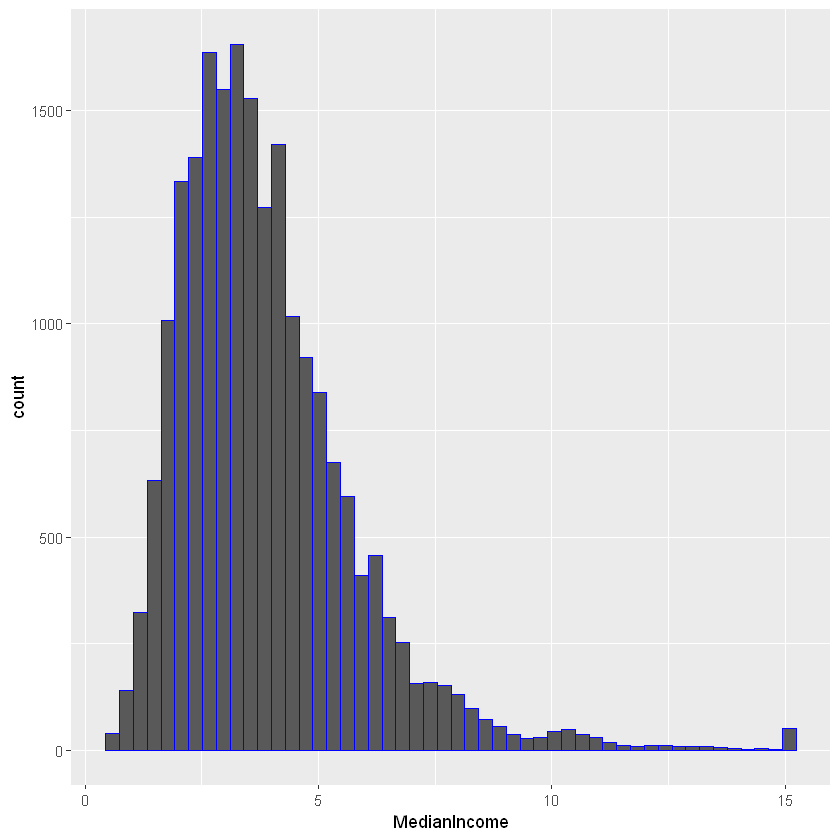

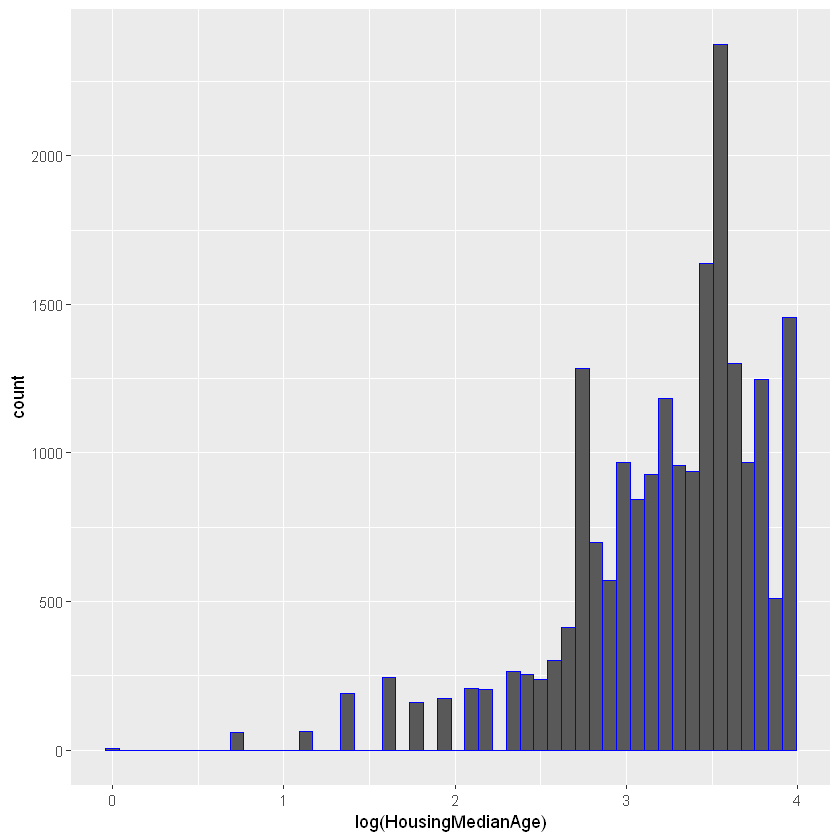

In [13]:
# También pintaremos histogramas de las variables para ver como se distribuyen
ggplot(california,aes(x=log(Population))) + geom_histogram(col="blue",bins=50)
ggplot(california,aes(x=log(Households))) + geom_histogram(col="blue",bins=50)
ggplot(california,aes(x=log(TotalRooms))) + geom_histogram(col="blue",bins=50)
ggplot(california,aes(x=log(TotalBedrooms))) + geom_histogram(col="blue",bins=50)
ggplot(california,aes(x=Latitude)) + geom_histogram(col="blue",bins=50)
ggplot(california,aes(x=Longitude)) + geom_histogram(col="blue",bins=50)
ggplot(california,aes(x=MedianIncome)) + geom_histogram(col="blue",bins=50)
ggplot(california,aes(x=log(HousingMedianAge))) + geom_histogram(col="blue",bins=50)

# Algunos datos están muy pegados a la izquierda, por lo que probaremos aplicacarle el logaritmo para que se parezcan más
# a una distribución normal.

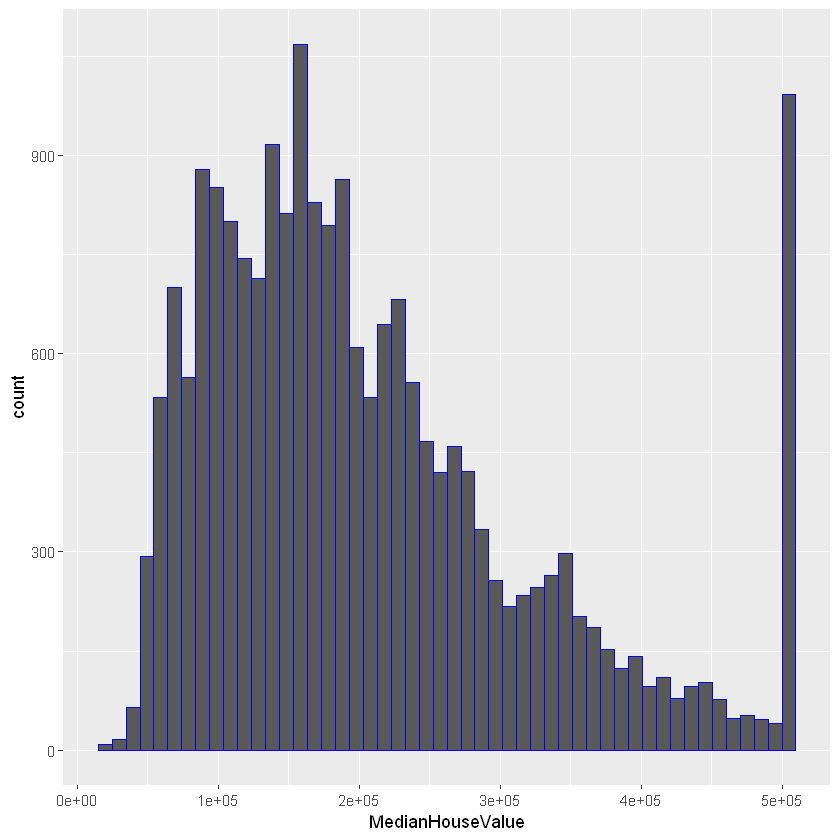

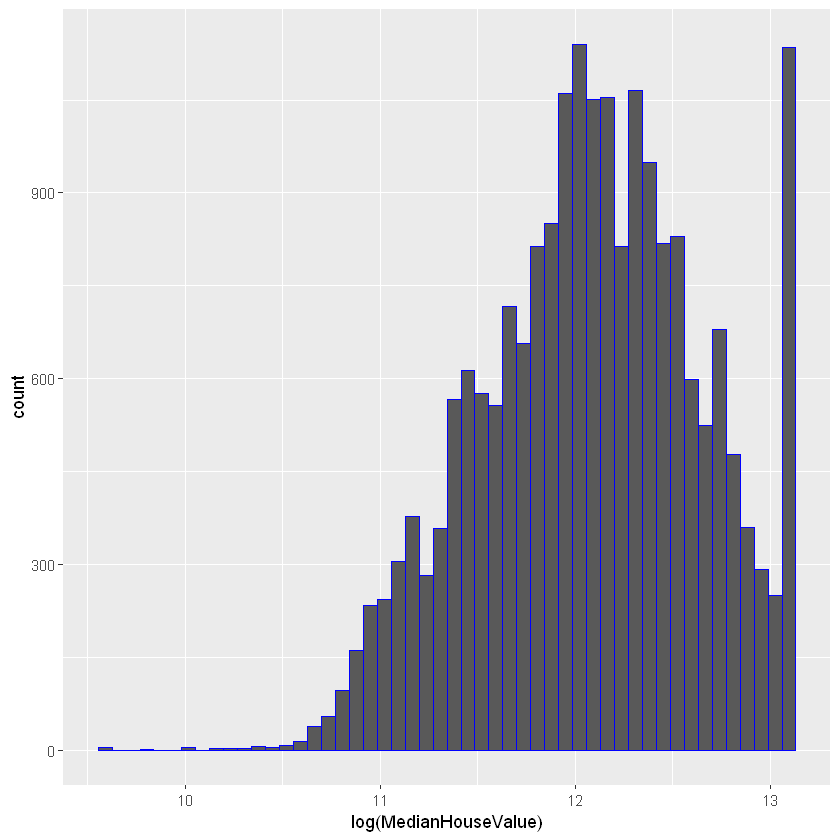

In [16]:
ggplot(california,aes(x=MedianHouseValue)) + geom_histogram(bins=50, col="blue")
ggplot(california,aes(x=log(MedianHouseValue))) + geom_histogram(bins=50, col="blue")
# Al igual que con las caracterísitcas del dataset, los datos parecen distribuirse mejor con una transformación
# logaritmica, así que más tarde probaremos a crear modelos con la variable MedianHouseValue transformada.

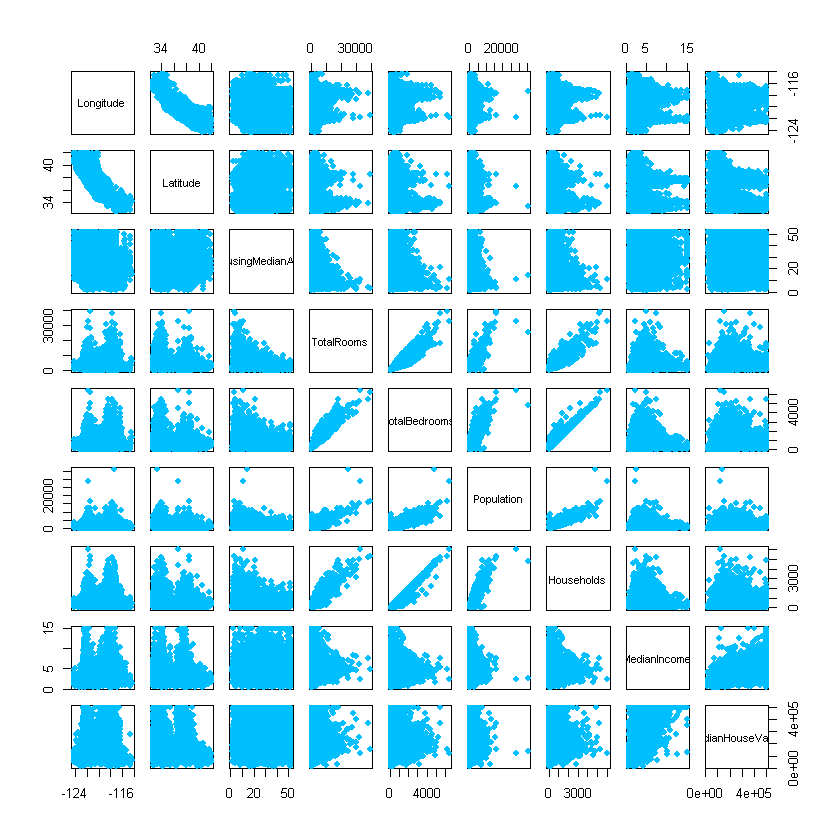

In [15]:
pairs(california,pch=16,col="deepskyblue")

# Como se puede ver en la gráfica, algunos de los datos del dataset parecen estar correlacionados.
# Esto parece bastante normal, ya que ocurre con variable como Longitude y Latitude, o TotalRooms
# y TotalBedrooms. En este caso esa correlación nos puede servir para intentar mejorar el modelo 
# mediante interacciones entre dichas variables.

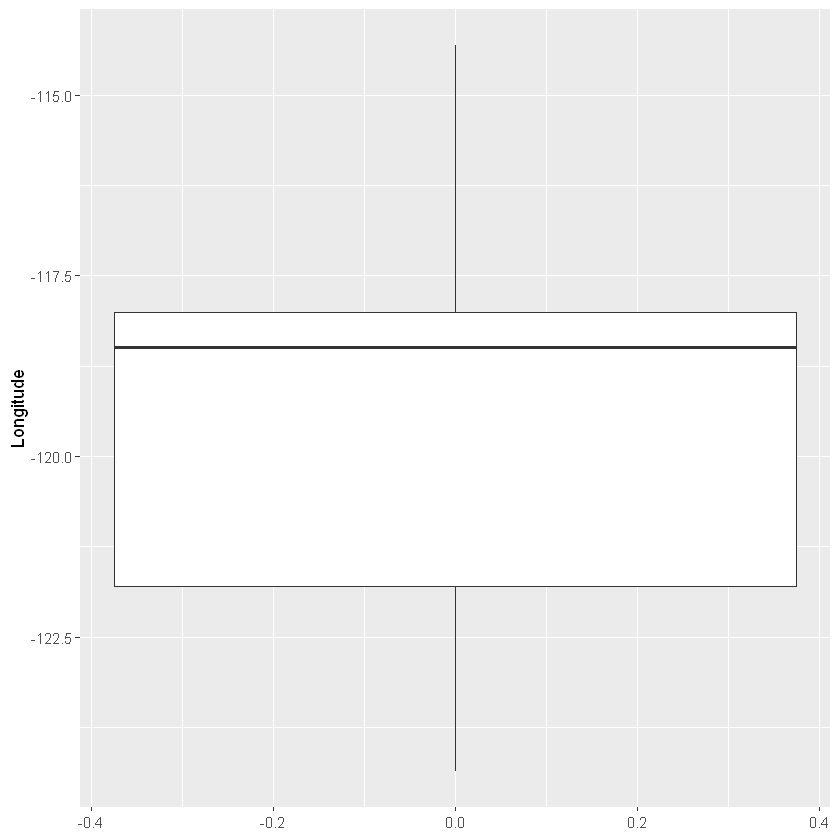

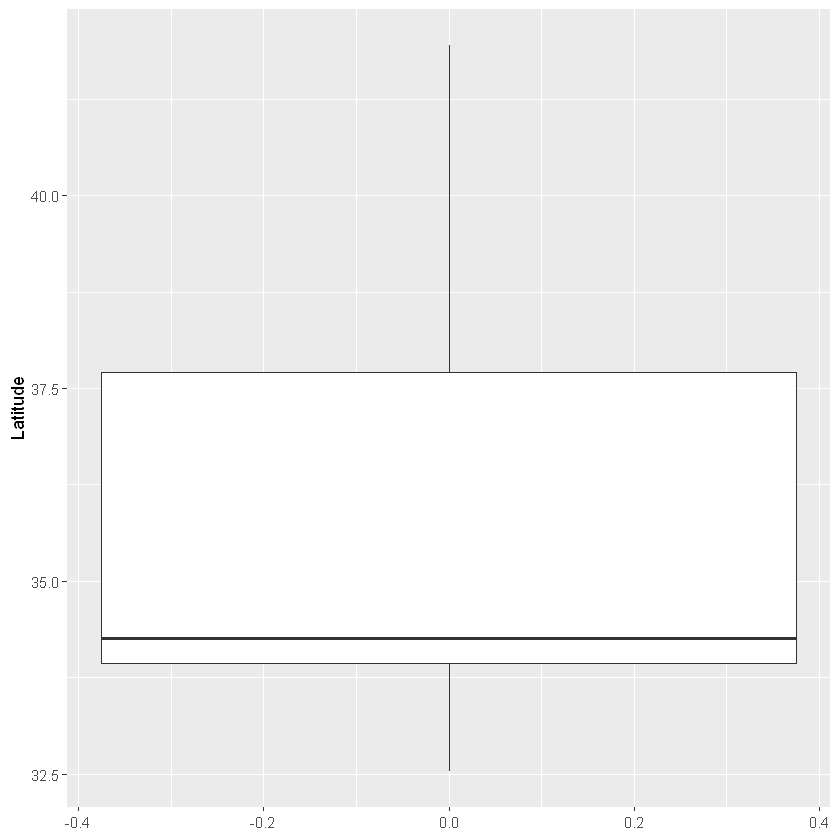

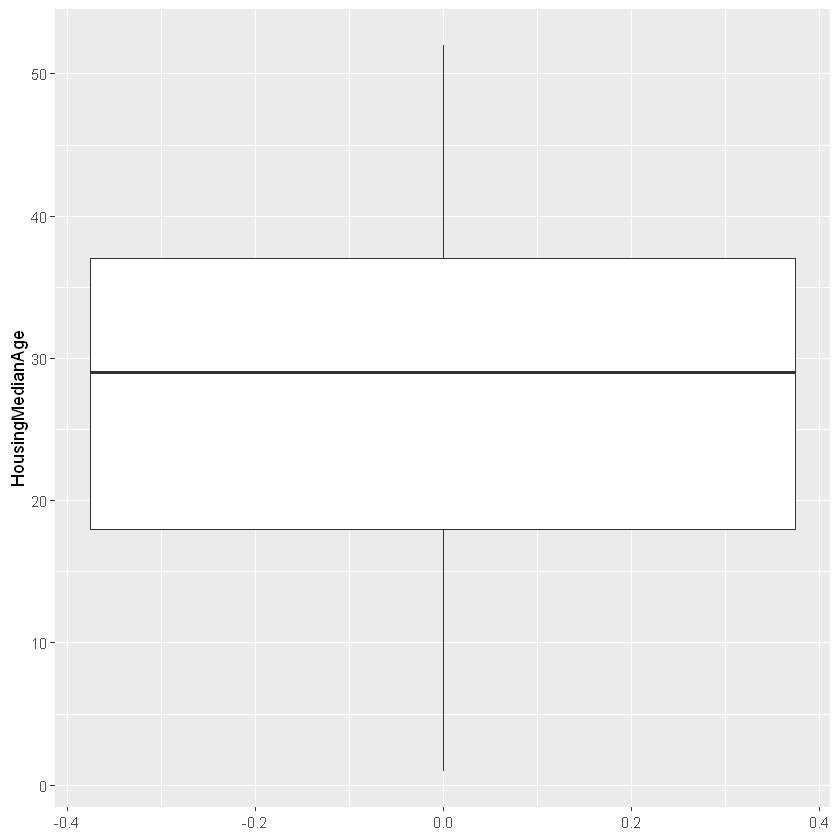

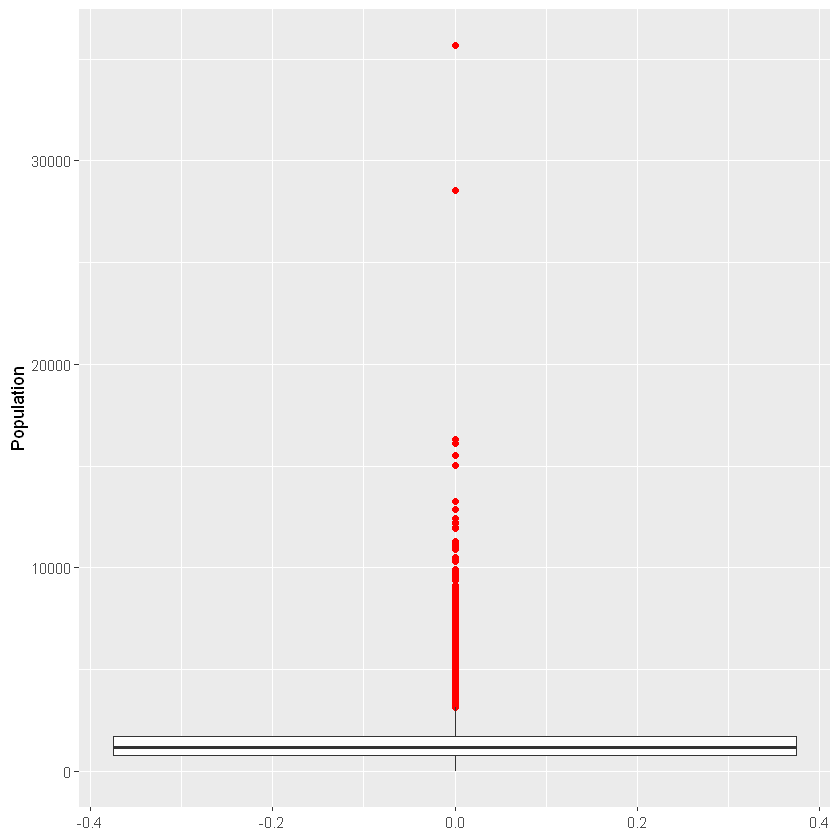

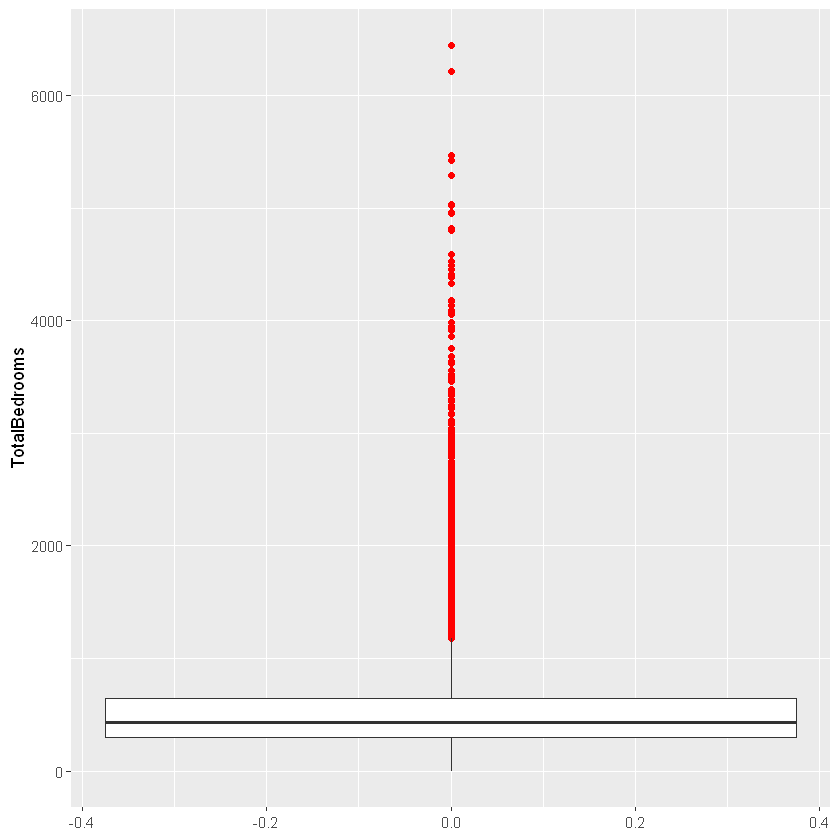

In [17]:
ggplot(california, aes(y=Longitude))+ geom_boxplot(outlier.color = "red")
ggplot(california, aes(y=Latitude))+ geom_boxplot(outlier.color = "red")
ggplot(california, aes(y=HousingMedianAge))+ geom_boxplot(outlier.color = "red")
ggplot(california, aes(y=Population))+ geom_boxplot(outlier.color = "red")
ggplot(california, aes(y=TotalBedrooms))+ geom_boxplot(outlier.color = "red")
ggplot(california, aes(y=TotalRooms))+ geom_boxplot(outlier.color = "red")
ggplot(california, aes(y=MedianIncome))+ geom_boxplot(outlier.color = "red")
ggplot(california, aes(y=Households))+ geom_boxplot(outlier.color = "red")
ggplot(california, aes(y=MedianHouseValue)) + geom_boxplot(outlier.color = "red")

# Pintando los boxplots nos damos cuenta que tenemos outliers, en este caso aparecen sobre las variables
# Population, TotalBedrooms, TotalRooms, Households, MedianIncome y MedianHouseValue. No los eliminaremos ya que 
# parecen ser casos extremos, en los que además parecen ser bastantes, por lo que no tienen porque ser realmente outliers
# y puede empeorar la predicción si los quitamos.

In [18]:
"La única variable que parece ser lineal es la variable MedianIncome, por ello
probaremos creando un modelo lineal con esta variable y veremos que resultados
nos da."
fit1 = lm(MedianHouseValue~MedianIncome,data=california)
summary(fit1)
plot(MedianHouseValue~MedianIncome,data=california)
abline(fit1,col="red")

"Según la información proporcionada por el modelo, se puede ver que la
variable MedianIncome sí que nos da información sobre el modelo y es 
importante para predecir. Aun así, el resultado del Adjusted R-squared es muy
pobre; por ello probaremos a añadir más variables."

[1] "La única variable que parece ser lineal es la variable MedianIncome, por ello\nprobaremos creando un modelo lineal con esta variable y veremos que resultados\nnos da."


Call:
lm(formula = MedianHouseValue ~ MedianIncome, data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-540697  -55950  -16979   36978  434023 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   45085.6     1322.9   34.08   <2e-16 ***
MedianIncome  41793.8      306.8  136.22   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 83740 on 20638 degrees of freedom
Multiple R-squared:  0.4734,	Adjusted R-squared:  0.4734 
F-statistic: 1.856e+04 on 1 and 20638 DF,  p-value: < 2.2e-16


[1] "Según la información proporcionada por el modelo, se puede ver que la\nvariable MedianIncome sí que nos da información sobre el modelo y es \nimportante para predecir. Aun así, el resultado del Adjusted R-squared es muy\npobre; por ello probaremos a añadir más variables."

In [19]:
"Para comenzar, optaremos por crear un modelo con todas las variables e 
iremos retirando las variables que peor puedan predecir la variable (peor
p-valor tiene, más alto)"
fit2 = lm(MedianHouseValue~., data=california)
summary(fit2)

"Como se puede ver, según el modelo todas las variables son importantes para
predecir la variable MedianHouseValue, por lo cual optaremos por retirar
algunas variables y añadir interacciones y no linealidad"

[1] "Para comenzar, optaremos por crear un modelo con todas las variables e \niremos retirando las variables que peor puedan predecir la variable (peor\np-valor tiene, más alto)"


Call:
lm(formula = MedianHouseValue ~ ., data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-563013  -43592  -11327   30307  803996 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.594e+06  6.254e+04 -57.468  < 2e-16 ***
Longitude        -4.282e+04  7.130e+02 -60.061  < 2e-16 ***
Latitude         -4.258e+04  6.733e+02 -63.240  < 2e-16 ***
HousingMedianAge  1.156e+03  4.317e+01  26.787  < 2e-16 ***
TotalRooms       -8.182e+00  7.881e-01 -10.381  < 2e-16 ***
TotalBedrooms     1.134e+02  6.902e+00  16.432  < 2e-16 ***
Population       -3.854e+01  1.079e+00 -35.716  < 2e-16 ***
Households        4.831e+01  7.515e+00   6.429 1.32e-10 ***
MedianIncome      4.025e+04  3.351e+02 120.123  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69530 on 20631 degrees of freedom
Multiple R-squared:  0.6371,	Adjusted R-squared:  0.637 
F-statistic:  4528 on 8 and 20631 DF,  p-value

[1] "Como se puede ver, según el modelo todas las variables son importantes para\npredecir la variable MedianHouseValue, por lo cual optaremos por retirar\nalgunas variables y añadir interacciones y no linealidad"

In [20]:
fit3 = lm(MedianHouseValue~.-Longitude-Latitude,data=california)
"Resultados tercer modelo"
summary(fit3)

[1] "Resultados tercer modelo"


Call:
lm(formula = MedianHouseValue ~ . - Longitude - Latitude, data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-636230  -48172  -11755   34485  709402 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.595e+04  2.241e+03  -20.51   <2e-16 ***
HousingMedianAge  1.881e+03  4.532e+01   41.51   <2e-16 ***
TotalRooms       -1.964e+01  8.332e-01  -23.57   <2e-16 ***
TotalBedrooms     1.004e+02  7.489e+00   13.41   <2e-16 ***
Population       -3.550e+01  1.165e+00  -30.47   <2e-16 ***
Households        1.255e+02  8.055e+00   15.57   <2e-16 ***
MedianIncome      4.770e+04  3.422e+02  139.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 75970 on 20633 degrees of freedom
Multiple R-squared:  0.5667,	Adjusted R-squared:  0.5666 
F-statistic:  4497 on 6 and 20633 DF,  p-value: < 2.2e-16


In [21]:
fit4 = lm(MedianHouseValue~.-TotalBedrooms-TotalRooms,data=california)
"Resultados cuarto modelo"
summary(fit4)

[1] "Resultados cuarto modelo"


Call:
lm(formula = MedianHouseValue ~ . - TotalBedrooms - TotalRooms, 
    data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-536312  -44531  -11752   30856  879543 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.542e+06  6.113e+04  -57.95   <2e-16 ***
Longitude        -4.253e+04  6.935e+02  -61.33   <2e-16 ***
Latitude         -4.278e+04  6.498e+02  -65.84   <2e-16 ***
HousingMedianAge  1.136e+03  4.322e+01   26.28   <2e-16 ***
Population       -4.368e+01  1.031e+00  -42.36   <2e-16 ***
Households        1.415e+02  3.058e+00   46.26   <2e-16 ***
MedianIncome      3.792e+04  2.702e+02  140.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69990 on 20633 degrees of freedom
Multiple R-squared:  0.6322,	Adjusted R-squared:  0.6321 
F-statistic:  5912 on 6 and 20633 DF,  p-value: < 2.2e-16


In [22]:
fit5 = lm(MedianHouseValue~.-Households,data=california)
"Resultados quinto modelo"
summary(fit5)

[1] "Resultados quinto modelo"


Call:
lm(formula = MedianHouseValue ~ . - Households, data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-566279  -43499  -11344   30482  744792 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.673e+06  6.139e+04  -59.83   <2e-16 ***
Longitude        -4.368e+04  7.010e+02  -62.31   <2e-16 ***
Latitude         -4.326e+04  6.654e+02  -65.02   <2e-16 ***
HousingMedianAge  1.165e+03  4.319e+01   26.99   <2e-16 ***
TotalRooms       -8.439e+00  7.879e-01  -10.71   <2e-16 ***
TotalBedrooms     1.497e+02  3.967e+00   37.74   <2e-16 ***
Population       -3.514e+01  9.416e-01  -37.32   <2e-16 ***
MedianIncome      4.042e+04  3.343e+02  120.91   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69600 on 20632 degrees of freedom
Multiple R-squared:  0.6364,	Adjusted R-squared:  0.6363 
F-statistic:  5158 on 7 and 20632 DF,  p-value: < 2.2e-16


[1] "Resultados sexto modelo"


Call:
lm(formula = MedianHouseValue ~ . - Households - TotalRooms - 
    TotalBedrooms, data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-541460  -47963  -13827   32555  485125 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.793e+06  6.396e+04 -59.303   <2e-16 ***
Longitude        -4.527e+04  7.259e+02 -62.368   <2e-16 ***
Latitude         -4.448e+04  6.815e+02 -65.274   <2e-16 ***
HousingMedianAge  9.285e+02  4.515e+01  20.563   <2e-16 ***
Population       -8.973e-01  4.789e-01  -1.874    0.061 .  
MedianIncome      3.781e+04  2.838e+02 133.222   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 73530 on 20634 degrees of freedom
Multiple R-squared:  0.5941,	Adjusted R-squared:  0.594 
F-statistic:  6040 on 5 and 20634 DF,  p-value: < 2.2e-16


[1] "Parece que las variables TotalRooms o TotalBedrooms sí que aportan algo de\ninformación por ello nos quedaremos con una de las dos ya que parecen estar relacionadas.\nDe estas nos quedaremos con TotalBedrooms."

[1] 0.9298933

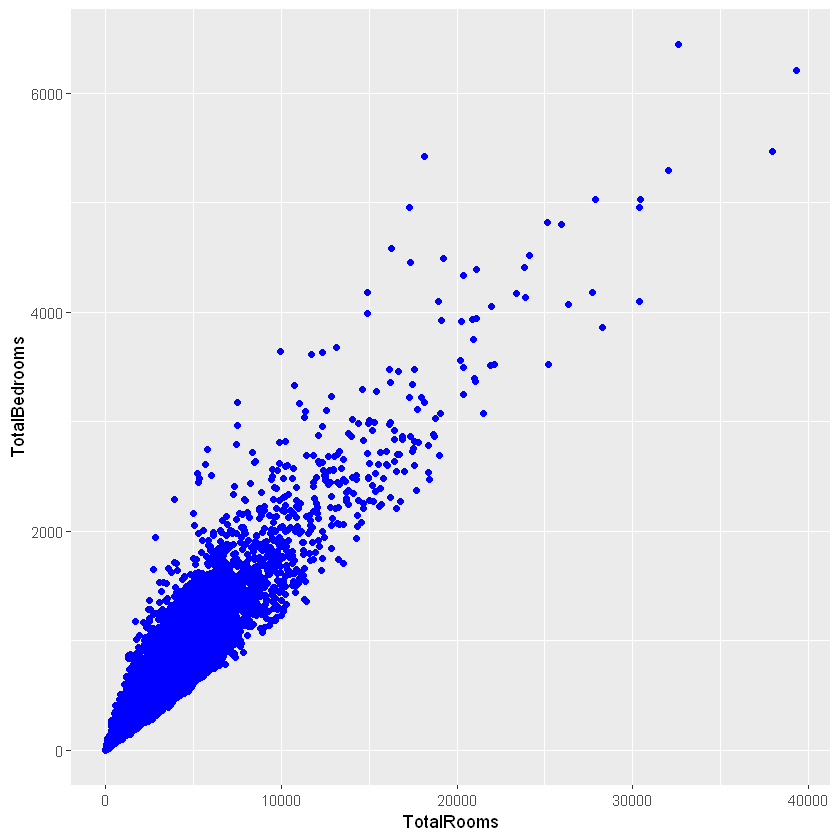

In [23]:

fit6 = lm(MedianHouseValue~.-Households-TotalRooms-TotalBedrooms,data=california)
"Resultados sexto modelo"
summary(fit6)
"Parece que las variables TotalRooms o TotalBedrooms sí que aportan algo de
información por ello nos quedaremos con una de las dos ya que parecen estar relacionadas.
De estas nos quedaremos con TotalBedrooms."
ggplot(california, aes(x=TotalRooms,y=TotalBedrooms)) +  geom_point(col="blue")
cor(california$TotalBedrooms, california$TotalRooms)


In [24]:
fit7 = lm(MedianHouseValue~.-Households-TotalRooms,data=california)
summary(fit7)

"Mirando la forma que la gráfica de HouseMedianAge vs MedianHouseValue
parece que no hay ninguna relación lineal entre las dos, así que probaremos
a quitarla también"


Call:
lm(formula = MedianHouseValue ~ . - Households - TotalRooms, 
    data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-544206  -43969  -11559   30735  796545 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.781e+06  6.071e+04  -62.29   <2e-16 ***
Longitude        -4.517e+04  6.890e+02  -65.56   <2e-16 ***
Latitude         -4.501e+04  6.469e+02  -69.57   <2e-16 ***
HousingMedianAge  1.194e+03  4.322e+01   27.64   <2e-16 ***
TotalBedrooms     1.161e+02  2.437e+00   47.66   <2e-16 ***
Population       -3.808e+01  9.029e-01  -42.18   <2e-16 ***
MedianIncome      3.829e+04  2.696e+02  142.04   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69790 on 20633 degrees of freedom
Multiple R-squared:  0.6344,	Adjusted R-squared:  0.6343 
F-statistic:  5966 on 6 and 20633 DF,  p-value: < 2.2e-16


[1] "Mirando la forma que la gráfica de HouseMedianAge vs MedianHouseValue\nparece que no hay ninguna relación lineal entre las dos, así que probaremos\na quitarla también"

In [25]:
fit8 = lm(MedianHouseValue~.-Households-TotalRooms-HousingMedianAge, data=california)
summary(fit8)

"Como no hay una mejora/empeoramiento significativo probaremos a hacer
interacciones entre variables y elevar al cuadrado a algunas para ver si mejora
el modelo. También consideraremos variables que habíamos eliminado antes."


Call:
lm(formula = MedianHouseValue ~ . - Households - TotalRooms - 
    HousingMedianAge, data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-508897  -44306  -12397   30591  853599 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -4.248e+06  5.939e+04  -71.53   <2e-16 ***
Longitude     -5.104e+04  6.675e+02  -76.46   <2e-16 ***
Latitude      -5.030e+04  6.292e+02  -79.94   <2e-16 ***
TotalBedrooms  1.075e+02  2.461e+00   43.67   <2e-16 ***
Population    -3.922e+01  9.185e-01  -42.70   <2e-16 ***
MedianIncome   3.677e+04  2.687e+02  136.83   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 71070 on 20634 degrees of freedom
Multiple R-squared:  0.6208,	Adjusted R-squared:  0.6207 
F-statistic:  6757 on 5 and 20634 DF,  p-value: < 2.2e-16


[1] "Como no hay una mejora/empeoramiento significativo probaremos a hacer\ninteracciones entre variables y elevar al cuadrado a algunas para ver si mejora\nel modelo. También consideraremos variables que habíamos eliminado antes."

In [26]:
fit9 = lm( MedianHouseValue~.+I(MedianIncome^2),data=california)
summary(fit9)

# Parece que el modelo mejora algo aunque minimamente, añadiremos más variables para ver si mejora más o no.


Call:
lm(formula = MedianHouseValue ~ . + I(MedianIncome^2), data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-499603  -44139  -11085   30992  783310 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.499e+06  6.276e+04 -55.743  < 2e-16 ***
Longitude         -4.138e+04  7.195e+02 -57.503  < 2e-16 ***
Latitude          -4.109e+04  6.811e+02 -60.327  < 2e-16 ***
HousingMedianAge   1.219e+03  4.329e+01  28.165  < 2e-16 ***
TotalRooms        -1.047e+01  8.059e-01 -12.990  < 2e-16 ***
TotalBedrooms      1.274e+02  6.965e+00  18.291  < 2e-16 ***
Population        -3.710e+01  1.081e+00 -34.323  < 2e-16 ***
Households         4.060e+01  7.511e+00   5.405 6.55e-08 ***
MedianIncome       5.030e+04  8.652e+02  58.136  < 2e-16 ***
I(MedianIncome^2) -8.539e+02  6.782e+01 -12.590  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69260 on 20630 degrees of freedom
Multiple R-s

In [27]:
fit10 = lm(MedianHouseValue~.+I(Households^2), data=california)
summary(fit10)
# En este caso la diferencia no es significativa, así que no utilizaremos esta variable, al menos sola.


Call:
lm(formula = MedianHouseValue ~ . + I(Households^2), data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-559845  -43597  -11531   30368  852281 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.584e+06  6.253e+04 -57.314  < 2e-16 ***
Longitude        -4.264e+04  7.135e+02 -59.766  < 2e-16 ***
Latitude         -4.238e+04  6.740e+02 -62.870  < 2e-16 ***
HousingMedianAge  1.183e+03  4.347e+01  27.220  < 2e-16 ***
TotalRooms       -7.779e+00  7.917e-01  -9.827  < 2e-16 ***
TotalBedrooms     1.132e+02  6.898e+00  16.406  < 2e-16 ***
Population       -3.803e+01  1.083e+00 -35.121  < 2e-16 ***
Households        5.658e+01  7.686e+00   7.361 1.89e-13 ***
MedianIncome      4.023e+04  3.349e+02 120.133  < 2e-16 ***
I(Households^2)  -4.851e-03  9.589e-04  -5.059 4.25e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69490 on 20630 degrees of freedom
Multiple R-squared:  0.63

In [28]:
fit11 = lm(log(MedianHouseValue)~.+I(Households^2)+I(MedianIncome^2),data=california)
summary(fit11)
# En este caso si que vemos una mejora considerable conforme al modelo anterior, así que conservaremos
# nuestra variable predictora con la transformación logarítmica.


Call:
lm(formula = log(MedianHouseValue) ~ . + I(Households^2) + I(MedianIncome^2), 
    data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6247 -0.1991 -0.0126  0.1825  3.4084 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.029e+01  2.962e-01 -34.731  < 2e-16 ***
Longitude         -2.532e-01  3.398e-03 -74.513  < 2e-16 ***
Latitude          -2.563e-01  3.217e-03 -79.678  < 2e-16 ***
HousingMedianAge   4.368e-03  2.056e-04  21.240  < 2e-16 ***
TotalRooms        -6.459e-05  3.824e-06 -16.890  < 2e-16 ***
TotalBedrooms      6.919e-04  3.286e-05  21.056  < 2e-16 ***
Population        -1.478e-04  5.118e-06 -28.885  < 2e-16 ***
Households         1.761e-04  3.629e-05   4.854 1.22e-06 ***
MedianIncome       3.315e-01  4.086e-03  81.117  < 2e-16 ***
I(Households^2)   -2.611e-08  4.514e-09  -5.785 7.36e-09 ***
I(MedianIncome^2) -1.303e-02  3.203e-04 -40.677  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.

In [29]:
fit12 = lm(log(MedianHouseValue)~.+I(MedianIncome^2)
           +I(log(Population))+I(log(TotalBedrooms))
           +I(Longitude*Latitude) +I(Latitude**2)
           +I(Longitude**2) + I(Latitude**2 * Longitude**2) 
           +I(Longitude*Latitude**2) + I(Longitude**2*Latitude) 
           + I(log(TotalRooms)) - Households - HousingMedianAge
           , data=california)
summary(fit12)

# Este es el mejor modelo obtenido hasta ahora, se han eliminado las variables Households y HousingMedianAge
# ya que no aportaban nada realmente al modelo y las pérdidas en la variable R^2 ajustada son mínimas. Otras
# transformaciones como las logarítmicas se han probado debido a la información aportada por los histogramas
# anteriores (en los histogramas están transformados también). Las transformaciones a las variables Longitude
# y Latitude se han sido pruebas para intentar mejorar el modelo algo más.


Call:
lm(formula = log(MedianHouseValue) ~ . + I(MedianIncome^2) + 
    I(log(Population)) + I(log(TotalBedrooms)) + I(Longitude * 
    Latitude) + I(Latitude^2) + I(Longitude^2) + I(Latitude^2 * 
    Longitude^2) + I(Longitude * Latitude^2) + I(Longitude^2 * 
    Latitude) + I(log(TotalRooms)) - Households - HousingMedianAge, 
    data = california)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6597 -0.1806 -0.0130  0.1711  2.3404 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -9.004e+04  2.578e+03 -34.928  < 2e-16 ***
Longitude                   -1.502e+03  4.296e+01 -34.949  < 2e-16 ***
Latitude                     4.930e+03  1.423e+02  34.654  < 2e-16 ***
TotalRooms                  -2.392e-05  4.397e-06  -5.439 5.42e-08 ***
TotalBedrooms                1.737e-04  2.445e-05   7.102 1.27e-12 ***
Population                  -1.099e-05  6.158e-06  -1.784   0.0744 .  
MedianIncome                 3.323e-01  

In [30]:
nombre <- "datos/california" 
names(california)
run_lm_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    fitMulti=lm(log(Y)~.+I(X8^2)
           +I(log(X6))+I(log(X5))
           +I(X1*X2) +I(X2**2)
           +I(X1**2) + I(X2**2 * X1**2) 
           +I(X1*X2**2) + I(X1**2*X2) 
           + I(log(X4)) - X7 - X3
           , data=x_tra)
    # Transformamos los datos a su forma normal ya que la predicción está hecha sobre log(Y) y no sobre Y
    yprime=exp(predict(fitMulti,test))
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
lmMSEtrain<-mean(sapply(1:5,run_lm_fold,nombre,"train"))
lmMSEtest<-mean(sapply(1:5,run_lm_fold,nombre,"test"))
print(lmMSEtrain)
print(lmMSEtest)

"Ahora pasaremos a estudiar modelos con knn"

[1] "Longitude"        "Latitude"         "HousingMedianAge" "TotalRooms"      
[5] "TotalBedrooms"    "Population"       "Households"       "MedianIncome"    
[9] "MedianHouseValue"

[1] 4251981783
[1] 4260868184


[1] "Ahora pasaremos a estudiar modelos con knn"

In [31]:
require(kknn)
fitknn1 = kknn(MedianHouseValue~MedianIncome,california,california)
yprime = fitknn1$fitted.values
print(sqrt(sum((california$MedianHouseValue-yprime)^2)/length(yprime))) #RMSE

# Los resultados no parecen demasiado buenos, así que probaremos con todas las variables
fitknn2 = kknn(MedianHouseValue~.,california,california)
yprime = fitknn2$fitted.values
print(sqrt(sum((california$MedianHouseValue-yprime)^2))/length(yprime))

# Por si acaso, voy a probar con las mismas variables de mi mejor modelo lineal
fitknn3 = kknn(log(MedianHouseValue)~.+I(MedianIncome^2)
           +I(log(Population))+I(log(TotalBedrooms))
           +I(Longitude*Latitude) +I(Latitude**2)
           +I(Longitude**2) + I(Latitude**2 * Longitude**2) 
           +I(Longitude*Latitude**2) + I(Longitude**2*Latitude) 
           + I(log(TotalRooms)) - Households - HousingMedianAge
           , california, california)
yprime = exp(fitknn3$fitted.values)
print(sqrt(sum((california$MedianHouseValue-yprime)^2))/length(yprime))

# En este caso, las interraciones de las variables que funcionaban bien para el modelo lineal
# siguen funcionando bien para el algoritmo de knn. Por ello, el siguiente paso que voy a dar es 
# intentar mejorar el RMSE modificando los parámetros del modelo para intentar mejorarlo.
fitknn4= kknn(log(MedianHouseValue)~.+I(MedianIncome^2)
           +I(log(Population))+I(log(TotalBedrooms))
           +I(Longitude*Latitude) +I(Latitude**2)
           +I(Longitude**2) + I(Latitude**2 * Longitude**2) 
           +I(Longitude*Latitude**2) + I(Longitude**2*Latitude) 
           + I(log(TotalRooms)) - Households - HousingMedianAge
           , california, california,k=5)
yprime = exp(fitknn4$fitted.values)
print(sqrt(sum((california$MedianHouseValue-yprime)^2))/length(yprime))

# Parece que para k=5 da mejores resultados que para k=7, que es el valor por defecto, así que dejaremos el valor de k
# como 5. Ahora, vamos a probar a cambiar el kernel del algoritmo para ver si funciona mejor.
fitknn5= kknn(log(MedianHouseValue)~.+I(MedianIncome^2)
           +I(log(Population))+I(log(TotalBedrooms))
           +I(Longitude*Latitude) +I(Latitude**2)
           +I(Longitude**2) + I(Latitude**2 * Longitude**2) 
           +I(Longitude*Latitude**2) + I(Longitude**2*Latitude) 
           + I(log(TotalRooms)) - Households - HousingMedianAge
           , california, california,k=5,kernel="gaussian")
yprime = exp(fitknn5$fitted.values)
print(sqrt(sum((california$MedianHouseValue-yprime)^2))/length(yprime))

# Este modelo empeora con respecto al anterior, así que probaremos con otro kernel.

fitknn6= kknn(log(MedianHouseValue)~.+I(MedianIncome^2)
           +I(log(Population))+I(log(TotalBedrooms))
           +I(Longitude*Latitude) +I(Latitude**2)
           +I(Longitude**2) + I(Latitude**2 * Longitude**2) 
           +I(Longitude*Latitude**2) + I(Longitude**2*Latitude) 
           + I(log(TotalRooms)) - Households - HousingMedianAge
           , california, california,k=5, kernel="biweight")
yprime = exp(fitknn6$fitted.values)
print(sqrt(sum((california$MedianHouseValue-yprime)^2))/length(yprime))

# Por ahora este es nuestro mejor modelo, ahora tenemos que comprobar si el modelo no
# tiene sobreaprendizaje.


[1] 73156.04
[1] 272.3752
[1] 261.7797
[1] 227.1056
[1] 286.8212
[1] 152.2582


In [32]:
nombre <- "datos/california"
run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    fitMulti=kknn(log(Y)~.+I(X8^2)
           +I(log(X6))+I(log(X5))
           +I(X1*X2) +I(X2**2)
           +I(X1**2) + I(X2**2 * X1**2) 
           +I(X1*X2**2) + I(X1**2*X2) 
           + I(log(X4)) - X7 - X3
           , x_tra,test,k=5,kernel="biweight")
    # Transformamos los datos a su forma normal ya que la predicción está hecha sobre log(Y) y no sobre Y
    yprime=exp(fitMulti$fitted.values)
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
knnMSEtrain<-mean(sapply(1:5,run_knn_fold,nombre,"train"))
knnMSEtest<-mean(sapply(1:5,run_knn_fold,nombre,"test"))
print(knnMSEtrain)
print(knnMSEtest)

# En este caso, el error en train es mayor que el error que en test; esto suele ser bastante raro, así que
# probaremos con otros modelos de los creados antes para ver si funcionan mejor.

[1] 492992465
[1] 3889526433


In [33]:
nombre <- "datos/california"
run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    fitMulti=kknn(log(Y)~.+I(X8^2)
           +I(log(X6))+I(log(X5))
           +I(X1*X2) +I(X2**2)
           +I(X1**2) + I(X2**2 * X1**2) 
           +I(X1*X2**2) + I(X1**2*X2) 
           + I(log(X4)) - X7 - X3
           , x_tra,test)
    # Transformamos los datos a su forma normal ya que la predicción está hecha sobre log(Y) y no sobre Y
    yprime=exp(fitMulti$fitted.values)
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
knnMSEtrain<-mean(sapply(1:5,run_knn_fold,nombre,"train"))
knnMSEtest<-mean(sapply(1:5,run_knn_fold,nombre,"test"))
print(knnMSEtrain)
print(knnMSEtest)
# Para este algoritmo, aunque el error parece ser menor que para el modelo lineal, si que hay sobreaprendizaje.

[1] 1443179143
[1] 3549522486


In [34]:
nombre <- "datos/california"
run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    fitMulti=kknn(log(Y)~.+I(X8^2)
           +I(log(X6))+I(log(X5))
           +I(X1*X2) +I(X2**2)
           +I(X1**2) + I(X2**2 * X1**2) 
           +I(X1*X2**2) + I(X1**2*X2) 
           + I(log(X4)) - X7 - X3
           , x_tra,test,k=5)
    # Transformamos los datos a su forma normal ya que la predicción está hecha sobre log(Y) y no sobre Y
    yprime=exp(fitMulti$fitted.values)
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
knnMSEtrain2<-mean(sapply(1:5,run_knn_fold,nombre,"train"))
knnMSEtest2<-mean(sapply(1:5,run_knn_fold,nombre,"test"))
print(knnMSEtrain)
print(knnMSEtest)

# Al igual que para el modelo anterior, el modelo tiene sobreaprendiaje, pero los resultados parecen mejores que para
# el modelo lineal. Como el modelo anterior obtiene mejores resultados, nos quedaremos con este para comparar con el
# algoritmo de regresión lineal.

[1] 1443179143
[1] 3549522486


In [35]:
# Por último, utilizaremos el text de wilcoxon para ver cual de los dos modelos es mejor. Para ello compararemos nuestro
# mejor modelo lineal con el mejor modelo obtenido con knn.

tablatst = cbind(knnMSEtest,lmMSEtest)
difs <- (tablatst[,1] - tablatst[,2]) / tablatst[,1]
wilc_1_2 <- cbind(ifelse (difs<0, abs(difs)+0.1, 0+0.1), ifelse (difs>0, abs(difs)+0.1, 0+0.1))
colnames(wilc_1_2) <- c(colnames(tablatst)[1], colnames(tablatst)[2])
head(wilc_1_2)
LMvsKNNtst <- wilcox.test(wilc_1_2[,1], wilc_1_2[,2], alternative = "two.sided", paired=TRUE)
Rmas <- LMvsKNNtst$statistic
pvalue <- LMvsKNNtst$p.value
LMvsKNNtst <- wilcox.test(wilc_1_2[,2], wilc_1_2[,1], alternative = "two.sided", paired=TRUE)
Rmenos <- LMvsKNNtst$statistic
Rmas
Rmenos
pvalue

# Según los resultados del test de wilcoxon nos dice que sí que existe diferencia entre los datos y que el primero
# es el que es diferente. Por ello, podemos decir que el modelo con knn es mejor que el modelo de
# regresión lineal múltiple.


knnMSEtest lmMSEtest
knnMSEtest 0.300406   0.1

V 
1

V 
0

[1] 1